# Ensemble Techniques Project

## Goal is to classify the patients into the respective labels using the attributes from their voice recordings

In [361]:
#importing the required libraries
import pandas as pd
import numpy as np

#compare ensemble to each baseline classifier
from numpy import mean
from numpy import std

#For visualization
import seaborn as sns
import matplotlib.pyplot as plt  
sns.set(color_codes=True)        #adds color background (have to kill the kernel to see the changes of color)
%matplotlib inline 

#For scientific computations
from scipy import stats

#For model building
from sklearn.model_selection import train_test_split      #to split data into train and test
from sklearn.model_selection import cross_val_score       #to check average accuracies of various algorithms
from sklearn.linear_model import LogisticRegression       #For logistic regression model
from sklearn.naive_bayes import GaussianNB                #For Naive Bayes model
from sklearn.neighbors import KNeighborsClassifier        #For KNN classifier model
from sklearn.svm import SVC                               #For SVM model

from sklearn import preprocessing                         #For standardization

from sklearn import metrics                               #For classfication report, confusion matrix, score etc

from sklearn.preprocessing import MinMaxScaler            #For normalizing values

from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.ensemble import StackingClassifier           #importing for stacking ensemble
from sklearn.model_selection import RepeatedStratifiedKFold #For cross validation

#For Ensemble techniques
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Step 1: Load the dataset

In [362]:
data0 = pd.read_csv('C:\\Users\\Rakesh Gowda S N\\Documents\\Projects\\Project 3 -ET\\Data - Parkinsons.txt')

### Step 2: It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

In [363]:
data0.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [364]:
print('Shape of data:')
print(data0.shape)

print('')
print('Data types:')
data0.dtypes

Shape of data:
(195, 24)

Data types:


name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

#### * The dataset has 195 rows and 24 columns.  All the columns are numerical except for 'name' column which is an object and 'Status' is our target column.

In [365]:
#More info on data
data0.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [366]:
# Since status column is our target variable, we will arrange the column and put status column at the end.
# Use transpose on describe to get statiscal features of each column.

data1 = data0.pop('status')
data0['status'] = data1

data0.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


#### * There are no missing values in numerical columns. We can see that 'spread1' column has negative values. Target column 'status' seems to have more values of '1' compared to '0'.

1    147
0     48
Name: status, dtype: int64



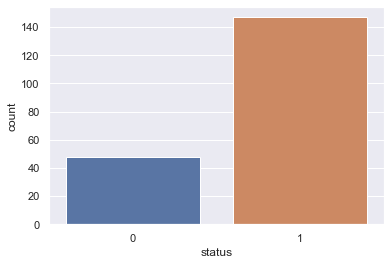

In [367]:
#To check counts of values in 'status' column
print(data0.status.value_counts());
print('')
sns.countplot(data0['status']);

#### * There are 147 rows with value '1' (Parkinson's) and 48 rows with values '0' (Healthy).

### Step 3: Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails, relationships between variables etc.

In [368]:
# for col in data0.columns: 
#     print(col) 

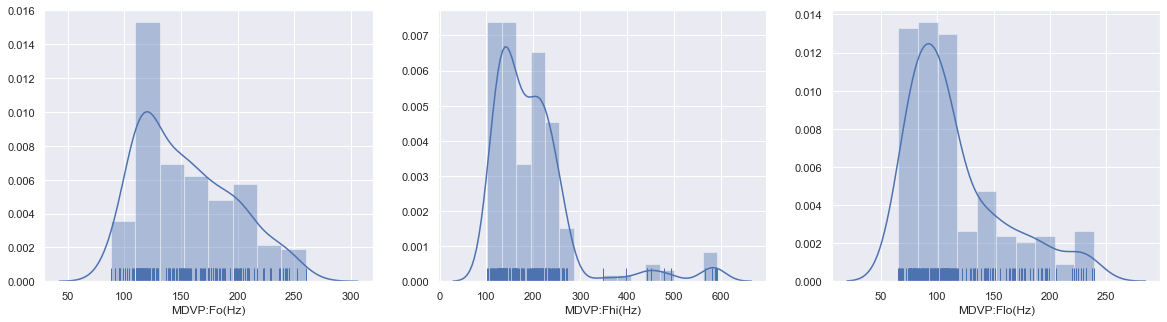

In [369]:
# Univariate Analysis

# Distribution of vocal fundamental frequencies

plt.figure(figsize= (20,5));

plt.subplot(1,3,1);
sns.distplot(data0['MDVP:Fo(Hz)'],rug=True);

plt.subplot(1,3,2);
sns.distplot(data0['MDVP:Fhi(Hz)'],rug=True);

plt.subplot(1,3,3);
sns.distplot(data0['MDVP:Flo(Hz)'],rug=True);

#### * From the above plots we can see that: 1) Average vocal fundamental frequency is more or less normal distribution with most of the values concentrated between 110Hz to 130Hz. 2) Maximum vocal fundamental frequency is having most of the values ranging between 100Hz and 280Hz, very few values near the right tail and thus skewness is not observed much. 3) Minimum vocal fundamental frequency is right skewed having more instances around 70Hz and 120Hz.

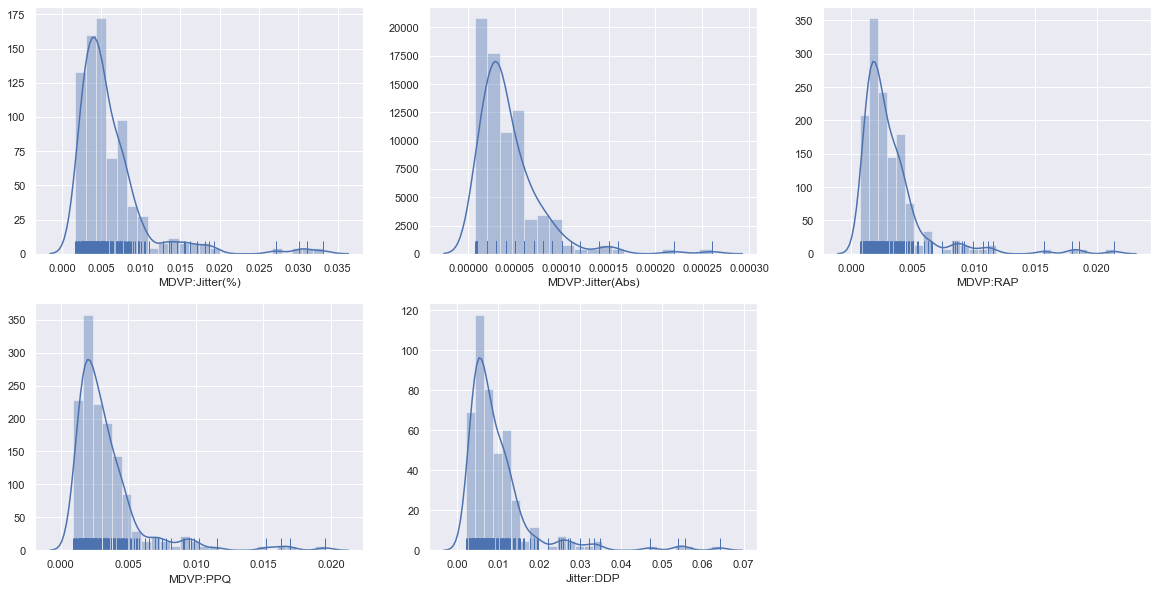

In [370]:
# Distribution in measures of variation in fundamental frequency (jitter)

plt.figure(figsize= (20,10));

plt.subplot(2,3,1);
sns.distplot(data0['MDVP:Jitter(%)'],rug=True);

plt.subplot(2,3,2);
sns.distplot(data0['MDVP:Jitter(Abs)'],rug=True);

plt.subplot(2,3,3);
sns.distplot(data0['MDVP:RAP'],rug=True);

plt.subplot(2,3,4);
sns.distplot(data0['MDVP:PPQ'],rug=True);

plt.subplot(2,3,5);
sns.distplot(data0['Jitter:DDP'],rug=True);

#### * The plots of measures of variation in fundamental frequency (jitters) shows that: 1) Jitter measures are having approximately 85 percent of the values in left tail of the spread.


#### Note: MDVP:Jitter(%) -	MDVP jitter in percentage, MDVP:Jitter(Abs) - MDVP absolute jitter in ms, MDVP:RAP - MDVP relative amplitude perturbation, MDVP:PPQ	- MDVP five-point period perturbation quotient, Jitter:DDP- Average absolute difference of differences between jitter cycles.

#### MDVP = Multidimensional Voice Program by Kay Pentax.

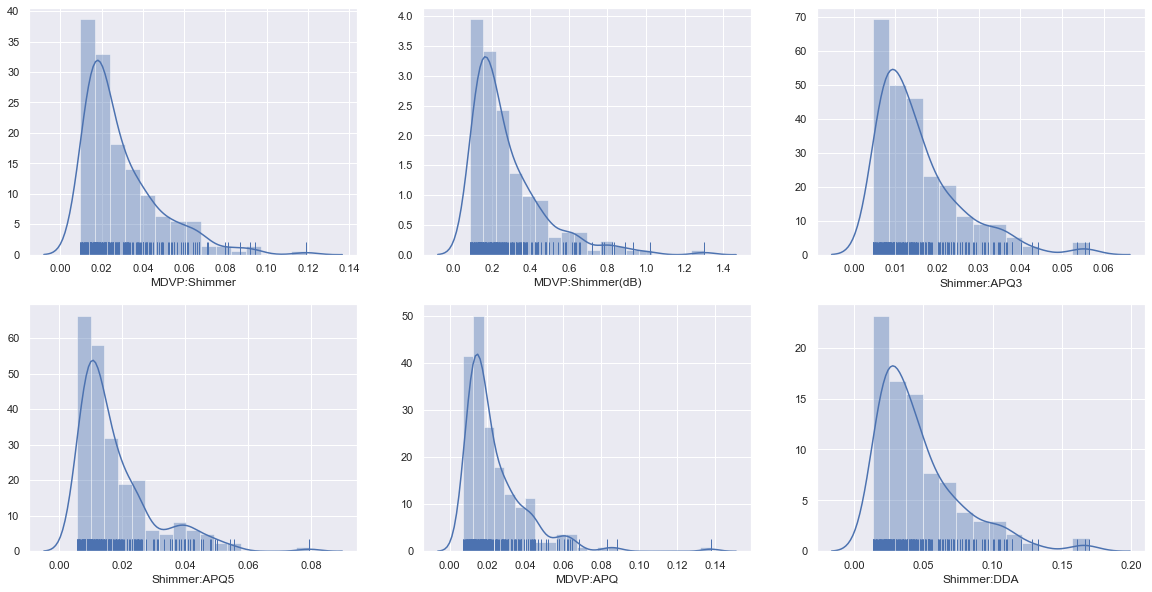

In [371]:
# Distribution in measures of variation in amplitude (shimmer)

plt.figure(figsize= (20,10));

plt.subplot(2,3,1);
sns.distplot(data0['MDVP:Shimmer'],rug=True);

plt.subplot(2,3,2);
sns.distplot(data0['MDVP:Shimmer(dB)'],rug=True);

plt.subplot(2,3,3);
sns.distplot(data0['Shimmer:APQ3'],rug=True);

plt.subplot(2,3,4);
sns.distplot(data0['Shimmer:APQ5'],rug=True);

plt.subplot(2,3,5);
sns.distplot(data0['MDVP:APQ'],rug=True);

plt.subplot(2,3,6);
sns.distplot(data0['Shimmer:DDA'],rug=True);

#### * The plots of measures of variation in amplitude (shimmers) shows that: 1) Shimmer measures are right skewed having most of the instances on the left and gradual decrease of instances as it moves towards the right tail.


#### Note: MDVP:Shimmer - MDVP local shimmer, MDVP:Shimmer(dB) - MDVP local shimmer in dB, Shimmer:APQ3 - Three-point amplitude perturbation quotient, Shimmer:APQ5 - Five-point amplitude perturbation quotient, MDVP:APQ - MDVP amplitude perturbation quotient, Shimmer:DDA - Average absolute differences between the amplitudes of consecutive periods.

#### MDVP = Multidimensional Voice Program by Kay Pentax.

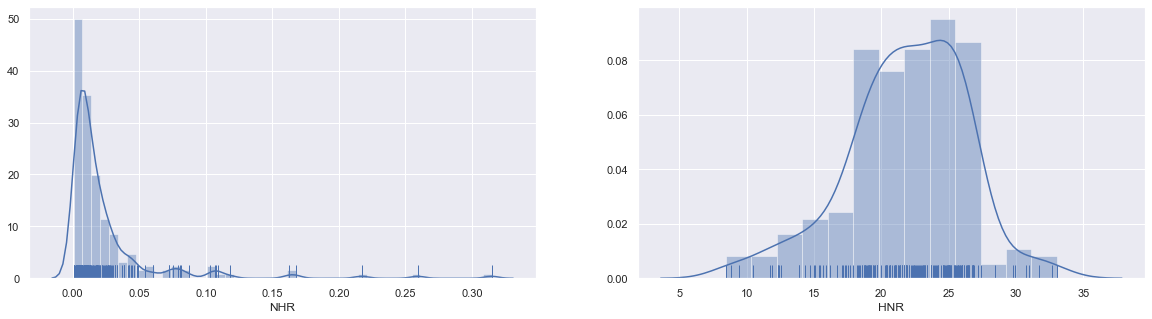

In [372]:
# Distribution in measures of ratio of noise to tonal components in the voice

plt.figure(figsize= (20,5));

plt.subplot(1,2,1);
sns.distplot(data0['NHR'],rug=True);

plt.subplot(1,2,2);
sns.distplot(data0['HNR'],rug=True);

#### * In the above plot we can observe that: 1) NHR has most of the values between 0 and 0.05 and few values occuring at random instances till 0.32, thus right skewed. 2) HNR is slightly skewed to the left, most of values occuring between 18 to 28.

#### Note: NHR - Noise-to-harmonics ratio, HNR - Harmonics-to-noise ratio.

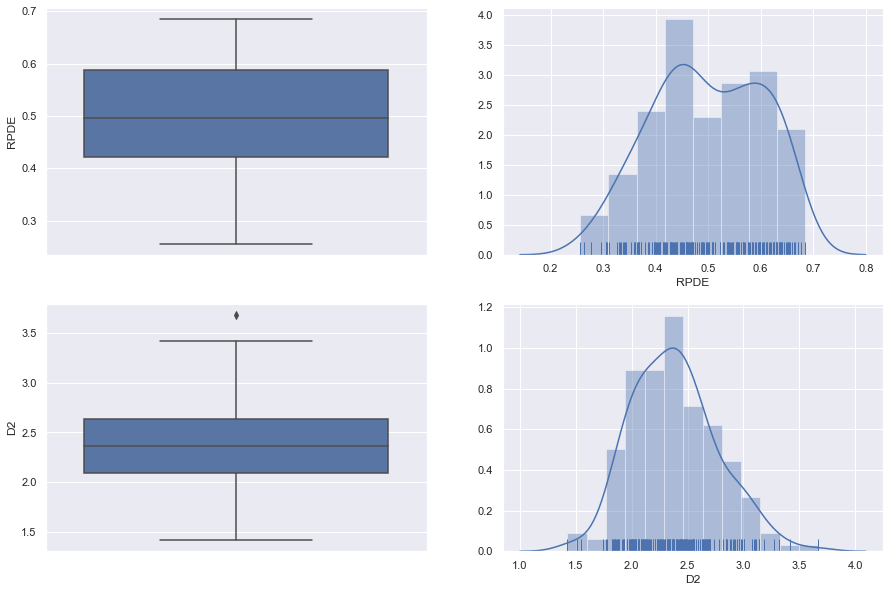

In [373]:
# Distribution of non linear dynamical complexity measures

plt.figure(figsize= (15,10));

plt.subplot(2,2,1);
sns.boxplot(data0['RPDE'],orient='v');

plt.subplot(2,2,3);
sns.boxplot(data0['D2'],orient='v');

plt.subplot(2,2,2);
sns.distplot(data0['RPDE'],rug=True);

plt.subplot(2,2,4);
sns.distplot(data0['D2'],rug=True);

#### * From the above plots it is evident that 1) The distribution in RPDE and D2 are more or less normal and is not affected much by skewness. 2) As for the outlier, D2 has very few outliers and RPDE doesnot have any outlier. The quartiles and whiskers are approximately equal for D2, whereas for RPDE, the whisker towards the lowest observation is slightly longer than the whisker attached to 3rd quartile. 3) Medians are approximately 0.49 and 2.35 for RPDE and D2 respectively.

#### RPDE - Recurrence period density entropy measure, D2 - Correlation dimension.

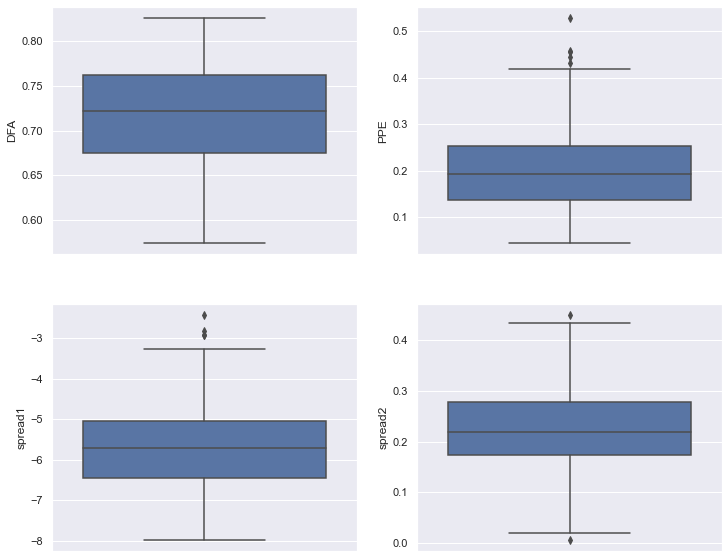

In [374]:
# Distribution of signal fractal scaling component and non linear measures of fundamental frequency variation

plt.figure(figsize= (12,10));

plt.subplot(2,2,1);
sns.boxplot(data0['DFA'],orient='v');

plt.subplot(2,2,2);
sns.boxplot(data0['PPE'],orient='v');

plt.subplot(2,2,3);
sns.boxplot(data0['spread1'],orient='v');

plt.subplot(2,2,4);
sns.boxplot(data0['spread2'],orient='v');

#### * The above plots show that: 1) Spread 1, Spread 2 and PPE have outliers and DFA does not have any outlier. 2) Whiskers ad quartiles are of equal lengths in spread 1, spread 2 and DFA, but PPE has elongated whisker after the 3rd quartile. We can use outlier treatment in later stage if necessary. 3) Meadians are 0.725, 0.19, -5.8, 0.215, for DFA, PPE, spread 1 and spread 2 respectively.

#### Note: DFA - Signal fractal scaling exponent of detrended fluctuation analysis, Spread1 and Spread2 -	Two nonlinear measures of fundamental Frequency variation, PPE - Pitch period entropy.

In [375]:
# for col in data0.columns: 
#     print(col) 

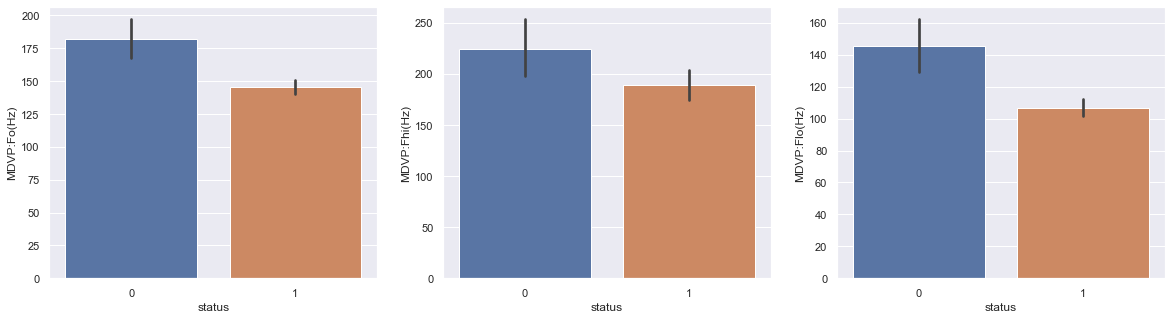

In [376]:
# Bivariate Analysis
# Numerical variables against target variable

# Distribution of vocal fundamental frequencies against status

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.barplot(data0['status'], data0['MDVP:Fo(Hz)']);

plt.subplot(1,3,2)
sns.barplot(data0['status'], data0['MDVP:Fhi(Hz)']);

plt.subplot(1,3,3)
sns.barplot(data0['status'], data0['MDVP:Flo(Hz)']);

#### * From the above plot it is evident that healthy people (status = 0) have higher vocal fundamental frequency compared to people who have Parkinson's disease (status = 1). Average vocal fundamental frequency is above 175Hz for healthy people and less than 150Hz for people with Parkinson's disease respectively.

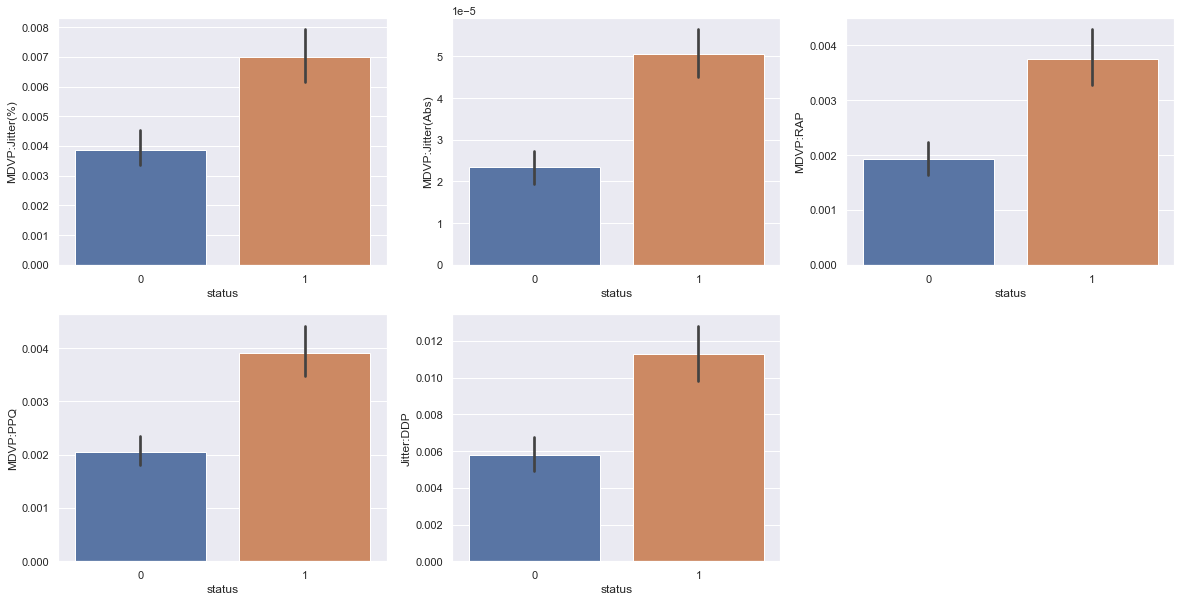

In [377]:
# Distribution in measures of variation in fundamental frequency (jitter) against status
    
plt.figure(figsize= (20,10));

plt.subplot(2,3,1);
sns.barplot(data0['status'], data0['MDVP:Jitter(%)']);

plt.subplot(2,3,2);
sns.barplot(data0['status'], data0['MDVP:Jitter(Abs)']);

plt.subplot(2,3,3);
sns.barplot(data0['status'], data0['MDVP:RAP']);

plt.subplot(2,3,4);
sns.barplot(data0['status'], data0['MDVP:PPQ']);

plt.subplot(2,3,5);
sns.barplot(data0['status'], data0['Jitter:DDP']);

#### * People who have Parkinson's disease have very high jitter compared to people who are healthy. It is observed that people having Jitter:DDP above 0.010 are having Parkinson's disease.

In [378]:
# for col in data0.columns: 
#     print(col) 

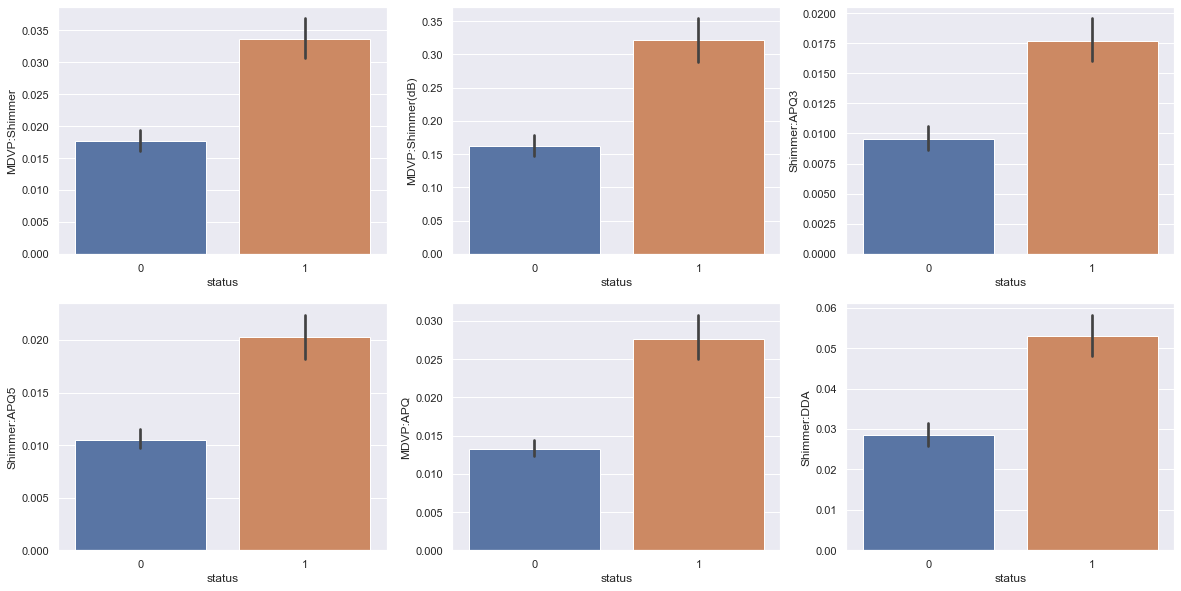

In [379]:
# Distribution in measures of variation in amplitude (shimmer) against status
    
plt.figure(figsize= (20,10));

plt.subplot(2,3,1);
sns.barplot(data0['status'], data0['MDVP:Shimmer']);

plt.subplot(2,3,2);
sns.barplot(data0['status'], data0['MDVP:Shimmer(dB)']);

plt.subplot(2,3,3);
sns.barplot(data0['status'], data0['Shimmer:APQ3']);

plt.subplot(2,3,4);
sns.barplot(data0['status'], data0['Shimmer:APQ5']);

plt.subplot(2,3,5);
sns.barplot(data0['status'], data0['MDVP:APQ']);

plt.subplot(2,3,6);
sns.barplot(data0['status'], data0['Shimmer:DDA']);

 #### * People who have Parkinson's disease have very high shimmer values compared to healthy individuals. People with MDVP:Shimmer(dB) exceeding 0.20 and Shimmer:DDA exceeding 0.035 are having Parkinson's disease.

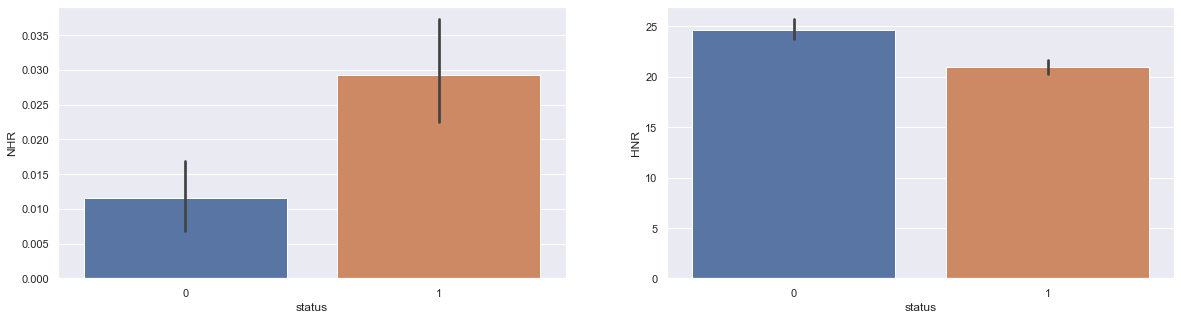

In [380]:
# Distribution in measures of ratio of noise to tonal components in the voice against status

plt.figure(figsize= (20,5));

plt.subplot(1,2,1);
sns.barplot(data0['status'], data0['NHR']);

plt.subplot(1,2,2);
sns.barplot(data0['status'], data0['HNR']);

#### * It is observed that NHR is lower in healthy individuals compared to people having Parkinson's disease. As far as the HNR is concerned, healthy individuals have slightly higher values compared to people having Parkinson's disease.

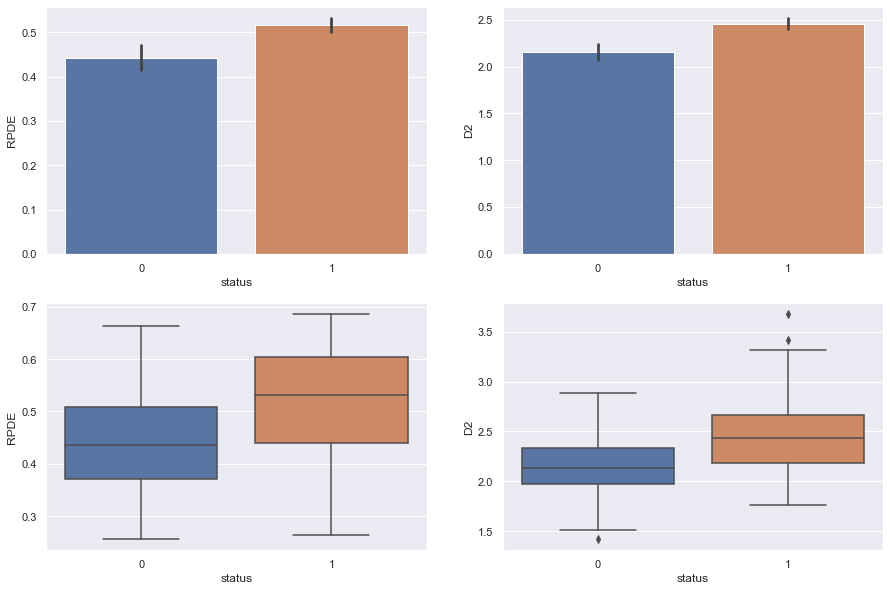

In [381]:
# Distribution of non linear dynamical complexity measures against status

plt.figure(figsize= (15,10));

plt.subplot(2,2,1);
sns.barplot(data0['status'], data0['RPDE']);

plt.subplot(2,2,2);
sns.barplot(data0['status'], data0['D2']);

plt.subplot(2,2,3);
sns.boxplot(data0['status'], data0['RPDE']);

plt.subplot(2,2,4);
sns.boxplot(data0['status'], data0['D2']);

#### * It is observed that both RPDE and D2 are slightly higher in people having Parkinson's disease compared to healthy individuals. Median is also high in healthy individuals in both RPDE and D2. Outliers can be seen in D2 which can be ignored as its very less.

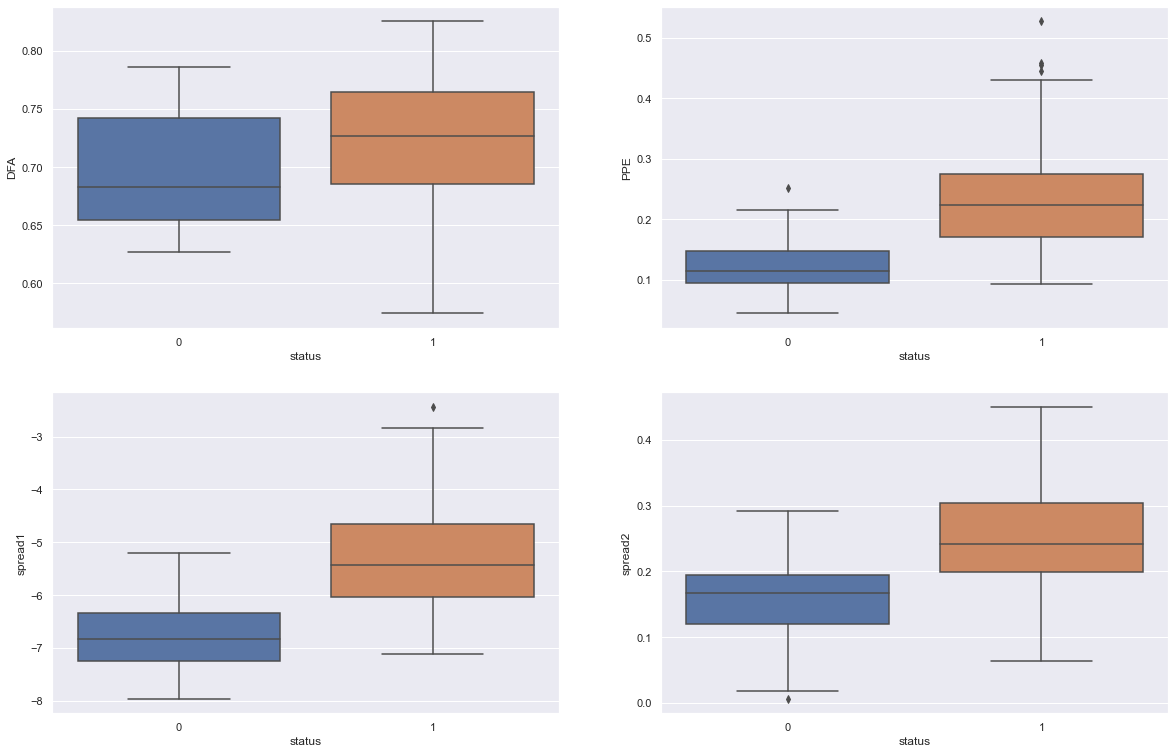

In [382]:
# Distribution of signal fractal scaling component and non linear measures of fundamental frequency variation against status

plt.figure(figsize= (20,13));

plt.subplot(2,2,1);
sns.boxplot(data0['status'], data0['DFA']);

plt.subplot(2,2,2);
sns.boxplot(data0['status'], data0['PPE']);

plt.subplot(2,2,3);
sns.boxplot(data0['status'], data0['spread1']);

plt.subplot(2,2,4);
sns.boxplot(data0['status'], data0['spread2']);

#### * Medians of signal fractal scaling component (DFA) and 2 of the non linear measures of fundamental frequency variation (PPE and spread2) are having higher values for people with Parkinson's disease. As for spread1, median for healthy individuals is lesser(-0.68) compared to people having Parkinson's disease(-0.55). Only few outliers are present in PPE and spread1 which can be ignored.

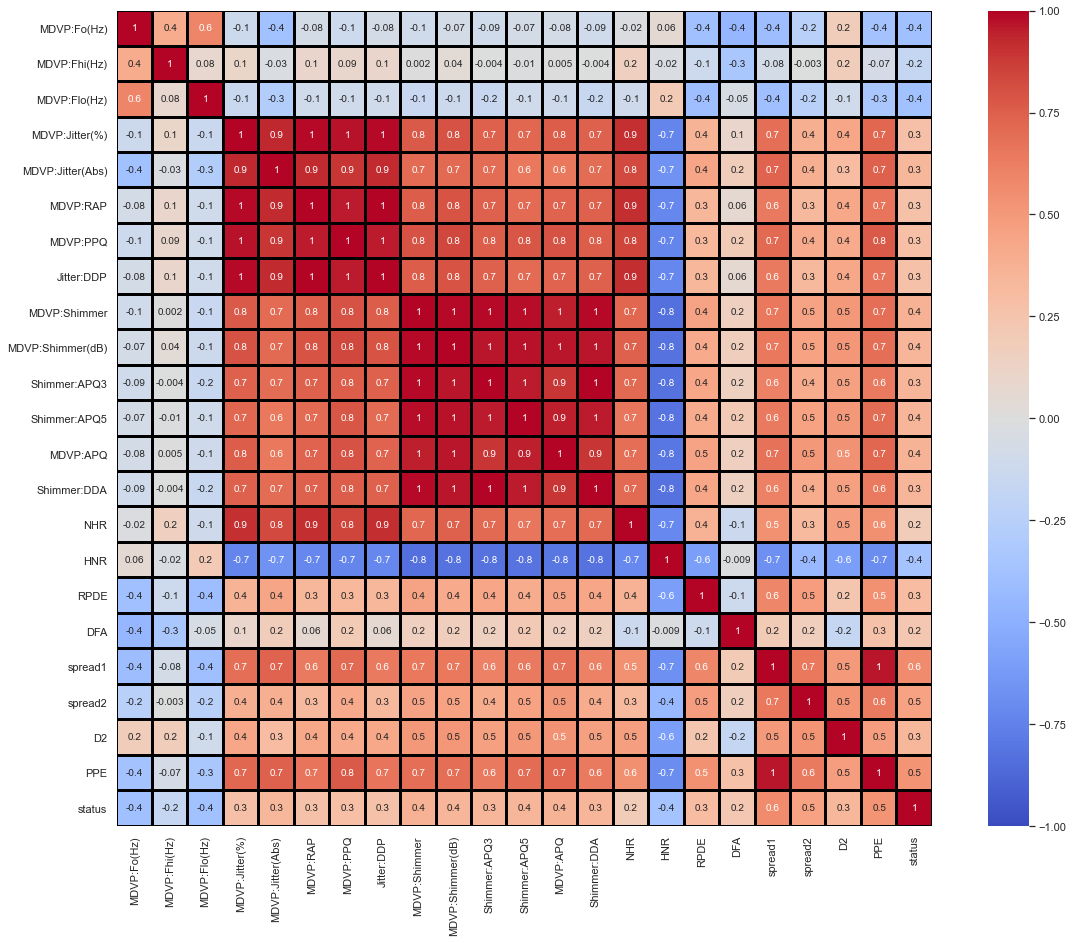

In [383]:
corrMat=data0.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corrMat, annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', 
            linewidths=2, linecolor='black', square=True, );

#### From the above correlation matrix we can observe that: 1) Non linear measures of fundamental frequency variation (PPE, spread1 and spread2) has high correlation value with status compared to other measures. 2) HNR, NHR are highly correlated with measures of variation in fundamental frequency(jitter values) and measures of variation in amplitude(shimmer values). 3) Similarly spread1 and PPE are highly correlated with jitter and shimmer values.

### Step 4: Split the dataset into training and test set in the ratio of 70:30 (Training:Test)

### Step 5: Prepare the data for training - Scale the data if necessary, get rid of missing values (if any) etc 

In [384]:
#Dropping unwanted columns, target variable and splitting data into train and test data.

pre_X=data0.drop(['status', 'name'], axis=1)
pre_y=data0.loc[:,'status']

#Normalizing dataset since data contains various ranges of values including negative values.
scaler=MinMaxScaler((-1,1))
X=scaler.fit_transform(pre_X)
y=pre_y

# pre_X.head().T
# pre_y.head().T

In [385]:
# taking 70:30 training and test set
test_data = 0.30 

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=test_data, random_state=1)

### Step 6: Training standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data 

In [386]:
#Logistic Regression
logreg_model=LogisticRegression()
logreg_model.fit(X_train,y_train)

logreg_predict = logreg_model.predict(X_test)
logreg_score   = accuracy_score(y_test,logreg_predict)

print("Logistic Model Score:")
print(logreg_score)
print('')
print('Classification Report')
print(classification_report(y_test,logreg_predict))

Logistic Model Score:
0.8305084745762712

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.53      0.67        19
           1       0.81      0.97      0.89        40

    accuracy                           0.83        59
   macro avg       0.86      0.75      0.78        59
weighted avg       0.84      0.83      0.82        59



In [387]:
#Naive Bayes
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)

nb_predict = nb_model.predict(X_test)
nb_score   = accuracy_score(y_test,nb_predict)

print("Naive Bayes Model Score:")
print(nb_score)
print('')
print('Classification Report')
print(classification_report(y_test,nb_predict))

Naive Bayes Model Score:
0.6779661016949152

Classification Report
              precision    recall  f1-score   support

           0       0.50      0.84      0.63        19
           1       0.89      0.60      0.72        40

    accuracy                           0.68        59
   macro avg       0.69      0.72      0.67        59
weighted avg       0.76      0.68      0.69        59



In [388]:
#SVM Classifier
svm_model=SVC(kernel='linear')
svm_model.fit(X_train,y_train)

svm_predict = svm_model.predict(X_test)
svm_score   = accuracy_score(y_test,svm_predict)

print("SVM Model Score:")
print(svm_score)
print('')
print('Classification Report')
print(classification_report(y_test,svm_predict))

SVM Model Score:
0.847457627118644

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.53      0.69        19
           1       0.82      1.00      0.90        40

    accuracy                           0.85        59
   macro avg       0.91      0.76      0.79        59
weighted avg       0.88      0.85      0.83        59



In [389]:
#KNN classifier
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)

knn_predict = knn_model.predict(X_test)
knn_score   = accuracy_score(y_test,knn_predict)

print("KNN Model Score:")
print(knn_score)
print('')
print('Classification Report')
print(classification_report(y_test,knn_predict))

KNN Model Score:
0.8983050847457628

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        19
           1       0.87      1.00      0.93        40

    accuracy                           0.90        59
   macro avg       0.93      0.84      0.87        59
weighted avg       0.91      0.90      0.89        59



In [390]:
#To check average accuracies of various algorithms we can use Cross Validation Scores

cv_score_lr=cross_val_score(LogisticRegression(),X,y)
cv_score_nb=cross_val_score(GaussianNB(),X,y)
cv_score_svm=cross_val_score(SVC(),X,y)
cv_score_knn=cross_val_score(KNeighborsClassifier(),X,y)

print('Logistic Regression Cross Validation Score is: ',cv_score_lr.mean())
print('Naive Bayes Cross Validation Score is        : ',cv_score_nb.mean())
print('SVM Cross Validation Score is                : ',cv_score_svm.mean())
print('KNN Cross Validation Score is                : ',cv_score_knn.mean())

Logistic Regression Cross Validation Score is:  0.8307692307692308
Naive Bayes Cross Validation Score is        :  0.6820512820512821
SVM Cross Validation Score is                :  0.8461538461538461
KNN Cross Validation Score is                :  0.7897435897435898


In [391]:
print('Accuracy and Cross Validation scores of each classifier:')

scores=pd.DataFrame(
                   {"Logistic Regression":[logreg_score,cv_score_lr.mean()],
                    "Naive Bayes":[nb_score,cv_score_nb.mean()],
                    "SVM model":[svm_score,cv_score_svm.mean()],
                    "KNN Classifier":[knn_score,cv_score_knn.mean()]},                  
                    index=['Accuracy','CV Score'])

scores

Accuracy and Cross Validation scores of each classifier:


,Logistic Regression,Naive Bayes,SVM model,KNN Classifier
Accuracy,0.830508,0.677966,0.847458,0.898305
CV Score,0.830769,0.682051,0.846154,0.789744


### Step 7: Train a meta-classifier and note the accuracy on test data

>lr_meta 0.85 (0.08)
>nb_meta 0.69 (0.14)
>svm_meta 0.87 (0.06)
>knn_meta 0.92 (0.07)
>stacking 0.88 (0.07)


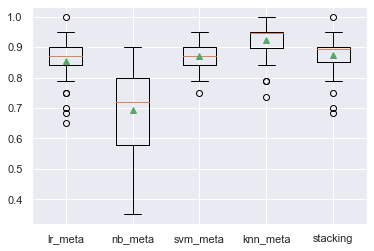

In [392]:
# get a stacking ensemble of models
def get_stacking():
    level0 = list()
    level0.append(('lr_meta', LogisticRegression()))
    level0.append(('nb_meta', GaussianNB()))
    level0.append(('svm_meta', SVC()))
    level0.append(('knn_meta', KNeighborsClassifier()))
    
# define meta learner model
    level1 = LogisticRegression()
    
# define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr_meta'] = LogisticRegression()
    models['nb_meta'] = GaussianNB()
    models['svm_meta'] = SVC()
    models['knn_meta'] = KNeighborsClassifier()
    models['stacking'] = get_stacking()
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.2f (%.2f)' % (name, mean(scores), std(scores)))
    
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [393]:
#To fit and predict model on meta classifier

level0 = list()
level0.append(('lr_meta', LogisticRegression()))
level0.append(('nb_meta', GaussianNB()))
level0.append(('svm_meta', SVC()))
level0.append(('knn_meta', KNeighborsClassifier()))
    
# define meta learner model
level1 = LogisticRegression()
    
meta_model=StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
meta_model.fit(X_train,y_train)

meta_predict = meta_model.predict(X_test)
meta_score   = accuracy_score(y_test,meta_predict)

print("Meta Model Score:")
print(meta_score)
print('')
print('Classification Report')
print(classification_report(y_test,meta_predict))
print('')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv_score_meta = cross_val_score(meta_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Cross Validation Score for Meta Classifier is: ')
print(mean(cv_score_meta))

Meta Model Score:
0.8135593220338984

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        19
           1       0.78      1.00      0.88        40

    accuracy                           0.81        59
   macro avg       0.89      0.71      0.74        59
weighted avg       0.85      0.81      0.79        59


Cross Validation Score for Meta Classifier is: 
0.8753508771929824


In [394]:
print('Accuracy and Cross Validation scores of each classifier:')

scores1=pd.DataFrame(
                   {"Logistic Regression":[logreg_score,cv_score_lr.mean()],
                    "Naive Bayes":[nb_score,cv_score_nb.mean()],
                    "SVM model":[svm_score,cv_score_svm.mean()],
                    "KNN Classifier":[knn_score,cv_score_knn.mean()],  
                    "Meta Classfier":[meta_score,cv_score_meta.mean()]},
                    index=['Accuracy','CV Score'])

scores1

Accuracy and Cross Validation scores of each classifier:


,Logistic Regression,Naive Bayes,SVM model,KNN Classifier,Meta Classfier
Accuracy,0.830508,0.677966,0.847458,0.898305,0.813559
CV Score,0.830769,0.682051,0.846154,0.789744,0.875351


#### * We can see that though the training dataset seems to be underfitted for Meta Classifer, Cross Validation score seems to be the highest among all models. Thus, for this case, it is observed that stacking models can give a more accurate prediction compared to individual model predictions. As far as the individual  models are concerned SVM model suits the best.

### Step 8: Training standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy

In [395]:
# Bagging Classifier

#Initialize the base classifier
bagging_base = DecisionTreeClassifier()

#No. of base classifier 
no_trees = 500                       # 500 seems to be optimum after checking for other numbers

#Bagging classifier 
bstrap_model = BaggingClassifier(base_estimator = bagging_base, n_estimators = no_trees, random_state = 1)
bstrap_model.fit(X_train,y_train)

bstrap_predict = bstrap_model.predict(X_test)
bstrap_score   = accuracy_score(y_test,bstrap_predict)

print("Bagging Model Score:")
print(bstrap_score)
print('')
print('Classification Report')
print(classification_report(y_test,bstrap_predict))
print('')

#For cross validation
cv_bag = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv_score_bstrap = cross_val_score(bstrap_model, X, y, scoring='accuracy', cv=cv_bag, n_jobs=-1, error_score='raise')
print('Cross Validation Score for Bagging Classifier is: ')
print(mean(cv_score_bstrap))

Bagging Model Score:
0.864406779661017

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.63      0.75        19
           1       0.85      0.97      0.91        40

    accuracy                           0.86        59
   macro avg       0.89      0.80      0.83        59
weighted avg       0.87      0.86      0.86        59


Cross Validation Score for Bagging Classifier is: 
0.9010526315789473


In [396]:
#Random Forest Tree classifier

#No. of base classifier 
no_trees = 100                       # 100 seems to be optimum after checking for other numbers

rfclass_model = RandomForestClassifier(n_estimators=no_trees, random_state = 1)
rfclass_model.fit(X_train,y_train)

rfclass_predict = rfclass_model.predict(X_test)
rfclass_score   = accuracy_score(y_test,rfclass_predict)

print("Random Forest Classifer Model Score:")
print(rfclass_score)
print('')
print('Classification Report')
print(classification_report(y_test,rfclass_predict))
print('')

#For cross validation
cv_rf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv_score_rf = cross_val_score(rfclass_model, X, y, scoring='accuracy', cv=cv_rf, n_jobs=-1, error_score='raise')
print('Cross Validation Score for Random Forest Classifier is: ')
print(mean(cv_score_rf))

Random Forest Classifer Model Score:
0.864406779661017

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.63      0.75        19
           1       0.85      0.97      0.91        40

    accuracy                           0.86        59
   macro avg       0.89      0.80      0.83        59
weighted avg       0.87      0.86      0.86        59


Cross Validation Score for Random Forest Classifier is: 
0.9078070175438596


In [397]:
#Boosting classifier

#No. of base classifier 
no_trees = 625                       # 625 seems to be optimum after checking for other numbers
# max_depth = 3 (default)

boost_model = XGBClassifier(n_estimators=no_trees, random_state = 1,learning_rate=0.1,
                            use_label_encoder=False,eval_metric='logloss')
boost_model.fit(X_train,y_train)

boost_predict = boost_model.predict(X_test)
boost_score   = accuracy_score(y_test,boost_predict)

print("XGB Boosting Model Score:")
print(boost_score)
print('')
print('Classification Report')
print(classification_report(y_test,boost_predict))
print('')

#For cross validation
cv_bst = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv_score_bst = cross_val_score(boost_model, X, y, scoring='accuracy', cv=cv_bst, n_jobs=-1)
print('Cross Validation Score for Random XG Boost Classifier is: ')
print(mean(cv_score_bst))

XGB Boosting Model Score:
0.864406779661017

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.63      0.75        19
           1       0.85      0.97      0.91        40

    accuracy                           0.86        59
   macro avg       0.89      0.80      0.83        59
weighted avg       0.87      0.86      0.86        59


Cross Validation Score for Random XG Boost Classifier is: 
0.9197368421052631


In [398]:
print('Cross Validation scores of each classifier (Ensemble Technioques):')

scores2=pd.DataFrame({
                        "Bagging Classifier":[cv_score_bstrap.mean()],
                        "Random Forest Classifier":[cv_score_rf.mean()],
                        "XG Boost Classifier":[cv_score_bst.mean()]
                    },
                    index=['CV Score'])

scores2

Cross Validation scores of each classifier (Ensemble Technioques):


,Bagging Classifier,Random Forest Classifier,XG Boost Classifier
CV Score,0.901053,0.907807,0.919737


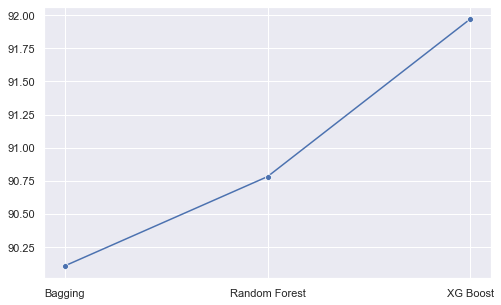

In [399]:
# x_ax = ['Bagging','Random Forest','XG Boost']
# y_ax = [cv_score_bstrap.mean()*100,cv_score_rf.mean()*100,cv_score_bst.mean()*100]

df1 = {'x_ax' : ['Bagging','Random Forest','XG Boost'],
       'y_ax' : [cv_score_bstrap.mean()*100,cv_score_rf.mean()*100,cv_score_bst.mean()*100]
      }

plt.figure(figsize=(8, 5))
# bplot = sns.barplot(x='x_ax',y='y_ax',data=df1);
lplot = sns.lineplot(x='x_ax',y='y_ax',data=df1, marker="o");

# for p in bplot.patches:
#     bplot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
#                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#### * From the above plot and cross validation of Ensemble techniques, it is observed that the accuracy scores are 90.11, 90.78 and 91.97 of Bagging Classifier using decision trees, Random Forest Tree Classifer and XG boost Classifier respectively.

### Step 9: Compare all the models and pick the best one among them.

In [400]:
scores3=pd.DataFrame(
                   {"Logistic Regression":[cv_score_lr.mean()*100],
                    "Naive Bayes":[cv_score_nb.mean()*100],
                    "SVM model":[cv_score_svm.mean()*100],
                    "KNN Classifier":[cv_score_knn.mean()*100],
                    "Meta Classfier":[cv_score_meta.mean()*100],
                    "Bagging Classifier":[cv_score_bstrap.mean()*100],
                    "Random Forest Classifier":[cv_score_rf.mean()*100],
                    "XG Boost Classifier":[cv_score_bst.mean()*100]},
                    index=['CV Score']).T

scores3

,CV Score
Logistic Regression,83.076923
Naive Bayes,68.205128
SVM model,84.615385
KNN Classifier,78.974359
Meta Classfier,87.535088
Bagging Classifier,90.105263
Random Forest Classifier,90.780702
XG Boost Classifier,91.973684


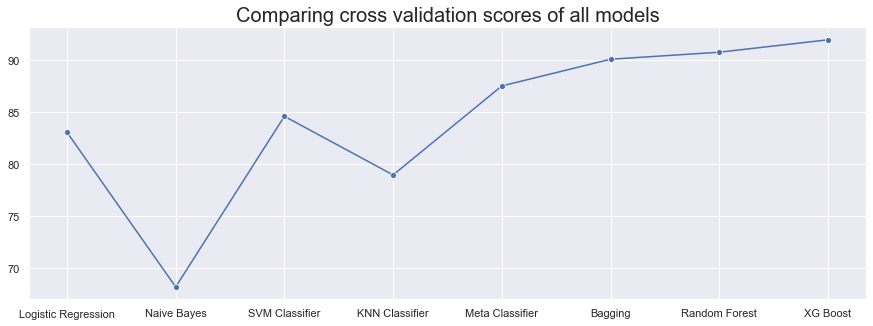

In [401]:
df2 = {'x_axis' : ['Logistic Regression', 'Naive Bayes', 'SVM Classifier', 'KNN Classifier', 
                   'Meta Classifier', 'Bagging','Random Forest','XG Boost'],
       'y_axis' : [cv_score_lr.mean()*100,cv_score_nb.mean()*100,cv_score_svm.mean()*100,cv_score_knn.mean()*100,
                 cv_score_meta.mean()*100,cv_score_bstrap.mean()*100,cv_score_rf.mean()*100,cv_score_bst.mean()*100]
      }

data = pd.DataFrame(df2)

plt.figure(figsize=(15,5))
plt.title("Comparing cross validation scores of all models", fontsize =20)
lplot2= sns.lineplot(x='x_axis',y='y_axis',data=df2,sort=False,marker="o");

#### * After comparing mean accuracies of all models we can conclude that: 1) Overall XG Boosting Classifier has the best accuracy. Other advantages of XG Boost can effectively handle large datasets due to it's features such as parallel learning, in-built regularization, capacity to handle missing values, effective tree pruning, etc. 2) All ensemble techniques (Bagging, Random Forest, Boosting) have given better accuracies compared to other standard supervised learning techniques. 3) Accuracy of stacking using Logistic Regression as Meta classifier also proved to be better against accuracies of individual supervised learning techniques. 4) Among supervised learning techniques SVM and Logistic Regression provided good results when compared to Naive Bayes and KNN classifier models. 5) Thus, we can say that XG Boost is the best fit model for the given dataset.